# -------------------------------------**Interpolation with Scipy**------------------------------------

## Project's Agenda

* Introduction
    1. Basic definition
    2. Types
        - Linear
        - Generalized Polynomial
        - Cubic
* Functions
    1. `interp1d`
    2. `interp2d`
* Applications and Further Reading

##  -----Introduction-----

### 1.Basic Definition
**Interpolation** :In *mathematics*, interpolation is a method of constructing new data points within the range of a discrete set of known data points.





In *engineering* and *science*, one often has a number of data points, obtained by sampling or experimentation, which represent the values of a function. Sometimes it is important to estimate the value of that function for an intermediate value of the independent variable. This may be achieved by curve fitting or regression analysis.

### **2.Types**

Lets look at a few popular methods of interpolation over the the scattered graph shown below. Other methods can be found [here](http://paulbourke.net/miscellaneous/interpolation/)
![Plot of of coordinates in a graph](https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Interpolation_Data.svg/600px-Interpolation_Data.svg.png)


### Linear interpolation

Linear interpolation is the simplest method of getting values at positions in between the data points. The points are simply joined by straight line segments. Each segment (bounded by two data points) can be interpolated independently.

The way it works is that it takes two data points $(x_a,y_a)$ and $(x_b, y_b)$ and determines the interpolant by:

$y= y_a+(y_b-y_a) \frac{x-x_a}{x_b-x_a}$ at the point $(x,y)$

$\frac{y-y_a}{y_b-y_a} = \frac{x-x_a}{x_b-x_a}$


$\frac{y-y_a}{x-x_a} = \frac{y_b-y_a}{x_b-x_a}$

This previous equation states that the slope of the new line between  $(x_a,y_a)$  and  $(x,y)$  is the same as the slope of the line between  $(x_a,y_a)$  and  $(x_b,y_b) $

For the scattered graph above the linear interpolation would something like this:

![interpolated](https://upload.wikimedia.org/wikipedia/commons/6/67/Interpolation_example_linear.svg)

The downside of such interpolation is that it is not precise and the interpolant is not differentiable at point $x_k$



### Polynomial Interpolation

This type of interpolation is the generalization of the linear interpolating case. We will not talk about the Mathematics of the polynomial interpolation mainly because it consists of a quarter of the Math 307 course. [Here](http://www.math.ubc.ca/~miljan/math307/notes/Chapter1.pdf) is a link to the topic for further reading. 


For the scattered graph the interpolation would look like this:

![polynomial interpolation](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Interpolation_example_polynomial.svg/600px-Interpolation_example_polynomial.svg.png)


### Spline Interpolation

We have already discussed that the linear interpolation uses a linear function for each of intervals $[x_k,x_{k+1}]$. Splines use low-degree polynomials in each of the intervals, and chooses the polynomial pieces such that they fit smoothly together. The resulting function is called a spline. [Here](http://www.math.ubc.ca/~miljan/math307/notes/1.2.6Splinesversion2.pdf) is a link to further reading

Below is an interesting example of Spline interpolation among the red dots scatter

![Splined](https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/Splined_epitrochoid.svg/369px-Splined_epitrochoid.svg.png)

## -----Functions-----

## **1.  `interp1d`**
Here we are going to use the scipy function interpolate, to be used used for 1-dimensional interpolation. From this function we will import `interp1d`.

*Now lets look at some of the important parameters of `interp1d`*



It takes in **x** & **y** arrays of values used to approximate some function.
It takes the **kind** parameter that takes in a string or an integer and specifies what kind of interpolation is to be carried out. Examples of strings include 'linear', 'nearest', 'zero', 'slinear', 'quadratic and 'cubic'. The latter three actually refer to a spline (of first, second and third order respectively) similar to one that we saw above.


There are numerous other parameters that interp1d takes but for our example just the one's explained above will siffice.
In order to learn more about these parameters run '`interp1d?`'

In [232]:
import numpy as np # We import numpy to aid us with mathematical functions
from scipy.interpolate import interp1d # As stated above, we import the interpolate function from scipy followed by interp1d
import matplotlib.pyplot as plt # this is to help us plot graphs while interpolating
%matplotlib inline

First lets consider the points that we are going to interpolate through. Below is an example.

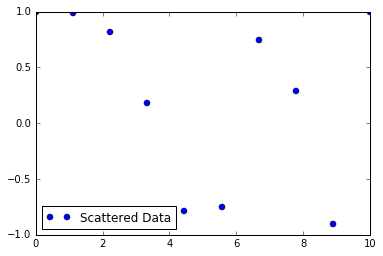

In [233]:
x = np.linspace(0,10, 10) #creates an array between 0 and 10 with 10 steps in between
y = np.cos(-x**2/8) # the function that uses the array defined by x


plt.plot(x, y, 'o') #plots the simple graph
plt.legend(['Scattered Data'], loc='best') # labels our graphs in the best location
plt.show()

Now lets start Interpolating!  

**Example 1** In our first example we use linear interpolation. Notice we have not defined the kind in this case because the default parameter is set to linear


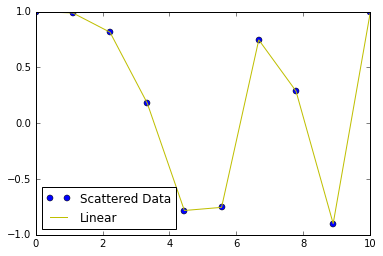

In [234]:
f1 = interp1d(x, y) # sets it to the default value of the interpolation which is linear
xnew = np.linspace(0, 10, 1000) # we define a new x array that will be used for our interpolating function


plt.plot(x,y,'o', xnew, f1(xnew), 'y' '-')
plt.legend(['Scattered Data', 'Linear'], loc='best')
plt.show()




**Example 2** In our second example we use cubic interpolation.

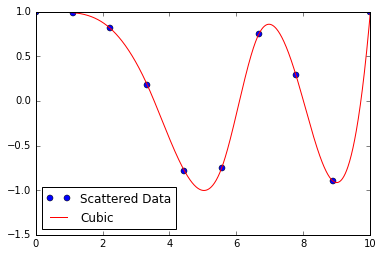

In [235]:
f2 = interp1d(x, y, kind='cubic') # We simply change the kind to cubic

plt.plot(x,y,'o', xnew, f2(xnew), 'r' '-')
plt.legend(['Scattered Data','Cubic'], loc='best')

plt.show()

** Example 3 ** Quadratic Interpolation

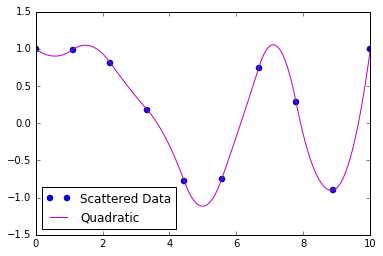

In [236]:
f2 = interp1d(x, y, kind='quadratic')

plt.plot(x,y,'o', xnew, f2(xnew), 'm' '-')
plt.legend(['Scattered Data','Quadratic'], loc='best')

plt.show()

## **1.  `interp2d`**

We are now also going to look at interpolating over a 2-dimensional grid. The process is similar to `interp1d` with very minor tweaks. Similar to last time `interp2d` takes the parameters of kind ('linear', 'cubic', 'quintic') and the arrays - 'x', 'y' and 'z' that approximate some function.

Like last time for a more detailed view into the parameters of `interp2d` -simply run `interp2d?`

** Example 1 ** Linear 2d Interpolation

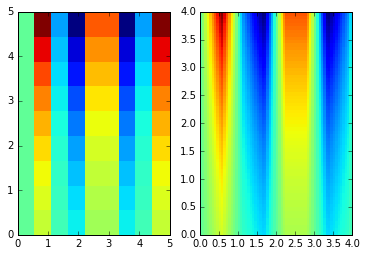

In [237]:
import numpy as np
from scipy.interpolate import interp2d # this time around we are importing the interp2d from Scipy
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 10)  # Creates an array just like in the previous cases
y = np.linspace(0, 5, 10)
X, Y = np.meshgrid(x, y) # Return coordinate matrices from coordinate vectors. So in essence it converts to matrix coordinates
Z = np.sin(np.pi*X)*np.exp(Y/3) # where z is our function that takes in the values from x and y

x2 = np.linspace(0, 4, 65)
y2 = np.linspace(0, 4, 65)
f = interp2d(x, y, Z, kind='linear') #defining the interpolation to be linear over the 2-d grid
Z2 = f(x2, y2)

fig, ax = plt.subplots(nrows=1, ncols=2) # Creating a common layer of subplot in a single cell. In this case we are defining the number of rows to be 1 and colomns to be 2
ax[0].pcolormesh(X, Y, Z)

X2, Y2 = np.meshgrid(x2, y2)
ax[1].pcolormesh(X2, Y2, Z2)

plt.show()

** Example 2 ** Cubic 2d Interpolation

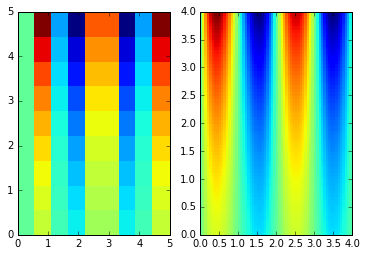

In [238]:
f = interp2d(x, y, Z, kind='cubic') # this time we change our interpolation method to 'cubic'
Z2 = f(x2, y2)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolormesh(X, Y, Z)

X2, Y2 = np.meshgrid(x2, y2)
ax[1].pcolormesh(X2, Y2, Z2)

plt.show()

** Example 3 ** Quintic 2d Interpolation

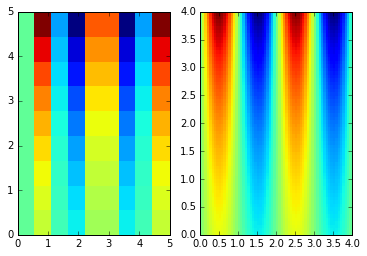

In [239]:
f = interp2d(x, y, Z, kind='quintic') # defining the kind to be 'quintic'
Z2 = f(x2, y2)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolormesh(X, Y, Z)

X2, Y2 = np.meshgrid(x2, y2)
ax[1].pcolormesh(X2, Y2, Z2)
plt.show()

##  -----Appications and Further Reading-----

**Applications** Interpolation is a very useful tool especially in engineering and computer operations that are in-built in graphics processors(e.g the function called lerp). 
This is used in [Bresenham's line algorithm](https://en.wikipedia.org/wiki/Bresenham%27s_line_algorithm) which lerps between two endpoints of a line. Also, applications in computer graphics use interpolation with parametric
piece-wise cubic Hermite polynomials in Bezier representation.

In a much simpler example, linear approximation can also be used to approximate population tables that have missing data. 

** Further Reading ** If you liked the content of this topic and would like to explore it further there is an interesting [video](https://www.youtube.com/watch?v=sNxW40hHSZU) by the Youtube channel, enthought.


One can also find details and more examples of the interpolate formula in this [link](http://docs.scipy.org/doc/scipy/reference/interpolate.html)